In [1]:
# torch
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
from torchinfo import summary
# torchvision
import torchvision
from torchvision import transforms, models
from torchvision import datasets # Opening the data set
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder # allows ease of access to local folder with images
#import cv2  #makes working with images easier
# visuals
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
# other
import numpy as np
import pandas as pd
# images
import Images as img


In [2]:
# device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Getting Data

In [3]:
img_transforms = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5), # all random is used to prevent overfitting
                                     transforms.RandomVerticalFlip(p=0.5),
                                     transforms.RandomRotation(degrees=1), 
                                     transforms.Resize((224,224)), # resize all images to be the same (avoids shape issues)
                                     transforms.ToTensor(),  # transform the image into a tensor form (C,H,W)
                                     transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])])

# ImageFolder
test_imgs= 'test/test' # used for small scale test
all_imgs= 'Animals/raw-img'
dataset = ImageFolder(root=all_imgs, transform= img_transforms)

In [4]:
# class_names
class_names = dataset.classes
class_names, len(class_names)

(['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse'], 7)

# Training split

In [5]:
train_size = int(0.8 * len(dataset)) # must use int can't have .33 of a image
test_size = len(dataset) - train_size # makes sure that the test size gets the rest of the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size]) # puts the dataset into it respective place train and test

len(train_dataset), len(test_dataset), len(dataset)

(13346, 3337, 16683)

# Data loaders

In [6]:

batch_size = 32

#train data
train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=batch_size,
                              shuffle=True)
# test data
test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=batch_size,
                             shuffle=False)

# Visualization

In [7]:
train_features, train_labels = next(iter(train_dataloader))
train_features.shape, train_labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].


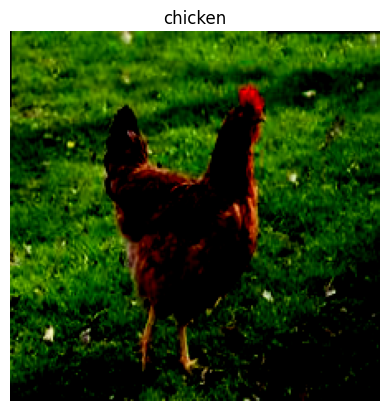

In [8]:
# sample data
torch.manual_seed(13)

# getting the random image
random_idx = torch.randint(0, len(train_features), size=[1]).item() # from (x,y, only get one item)
image, label = train_features[random_idx], train_labels[random_idx]

# matplot print
plt.imshow(np.transpose(image,(1,2,0)))
plt.title(class_names[label])
plt.axis(False)

# for a grid
def grid(dataloader):
    images, labels =next(iter(dataloader))
    grid = make_grid(images,nrow=8)
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(grid,(1,2,0)))
    plt.axis(False)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


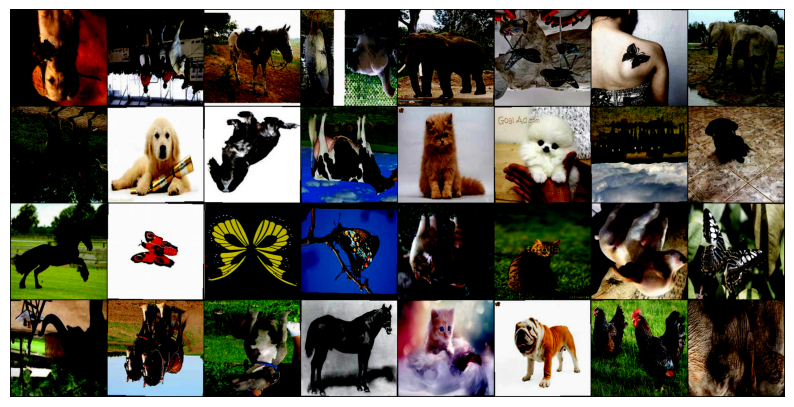

In [9]:
grid(train_dataloader)

# Building Model

In [10]:
class AnimalsV0(nn.Module):
    def __init__(self):
        super().__init__()

        # First Convolutional Layer
        self.model = nn.Sequential(nn.Conv2d(in_channels=3,
                                               out_channels=64,
                                               kernel_size=3,
                                               padding=1),
                                    nn.BatchNorm2d(64),
                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=64,
                                              out_channels=64,
                                              kernel_size=3,
                                              padding=1),
                                    nn.BatchNorm2d(64),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2,stride=2),

        # Second Convolutional Layer
                                    nn.Conv2d(in_channels=64,
                                               out_channels=128,
                                               kernel_size=3,
                                               padding=1),
                                    nn.BatchNorm2d(128),
                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=128,
                                              out_channels=128,
                                              kernel_size=3,
                                              padding=1),
                                    nn.BatchNorm2d(128),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2,stride=2),
        # third layer
                                    nn.Conv2d(in_channels=128,
                                               out_channels=256,
                                               kernel_size=3,
                                               padding=1),
                                    nn.BatchNorm2d(256),
                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=256,
                                              out_channels=256,
                                              kernel_size=3,
                                              padding=1),
                                    nn.BatchNorm2d(256),
                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=256,
                                              out_channels=256,
                                              kernel_size=3,
                                              padding=1),
                                    nn.BatchNorm2d(256),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2,stride=2),
        # 4th layer
                                    nn.Conv2d(in_channels=256,
                                               out_channels=512,
                                               kernel_size=3,
                                               padding=1),
                                    nn.BatchNorm2d(512),
                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=512,
                                              out_channels=512,
                                              kernel_size=3,
                                              padding=1),
                                    nn.BatchNorm2d(512),
                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=512,
                                              out_channels=512,
                                              kernel_size=3,
                                              padding=1),
                                    nn.BatchNorm2d(512),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2,stride=2),
        # 5th layer
                                    nn.Conv2d(in_channels=512,
                                              out_channels=512,
                                              kernel_size=3,
                                              padding=1),
                                    nn.BatchNorm2d(512),
                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=512,
                                              out_channels=512,
                                              kernel_size=3,
                                              padding=1),
                                    nn.BatchNorm2d(512),
                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=512,
                                              out_channels=512,
                                              kernel_size=3,
                                              padding=1),
                                    nn.BatchNorm2d(512),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2,stride=2),
        # fully connected layers
                                    nn.Flatten(),
                                    nn.Linear(in_features=512*7*7,
                                                out_features=4096),
                                    nn.ReLU(),
                                    nn.Dropout(),
                                    nn.Linear(in_features=4096,
                                               out_features=2048),
                                    nn.ReLU(),
                                    nn.Dropout(),

                                    nn.Linear(2048,len(class_names)))
    def forward(self, x):
        return self.model(x)

model_0 = AnimalsV0().to(device)

In [11]:
summary(model_0, input_size=(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
AnimalsV0                                [1, 7]                    --
├─Sequential: 1-1                        [1, 7]                    --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─BatchNorm2d: 2-2                  [1, 64, 224, 224]         128
│    └─ReLU: 2-3                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-4                       [1, 64, 224, 224]         36,928
│    └─BatchNorm2d: 2-5                  [1, 64, 224, 224]         128
│    └─ReLU: 2-6                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-7                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        73,856
│    └─BatchNorm2d: 2-9                  [1, 128, 112, 112]        256
│    └─ReLU: 2-10                        [1, 128, 112, 112]        --
│    └─Conv2d: 2-11                      [1, 128, 112, 112]        147,

# Accuracy

In [12]:
from torchmetrics import Accuracy
acc = Accuracy(task="multiclass", num_classes=len(class_names))

# Timing

In [13]:
from timeit import default_timer as timer

def train_time(start: float,
         end: float):
    total_time = end-start
    if total_time < 60:
        print(f"Time:{total_time:.2f} seconds")
    else:
        print(f"Time:{total_time/60:.2f} mins")
    return total_time


# Loss/Optimizer

In [14]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=.00001)

# Training Loop

In [ ]:
from tqdm.auto import tqdm
from torchmetrics import Accuracy
torch.manual_seed(14)
start_timer = timer()

epochs = 20
with tqdm(position=0, leave=True) as pbar:
    for epoch in tqdm(range(epochs),leave=True):
        model_0.train()
        total_loss, train_acc = 0,0
        for train_img,train_label in tqdm(train_dataloader, desc='secondary loop', leave=False):
            
            # to device
            train_img, train_label = train_img.to(device), train_label.to(device)

            # forward pass
            y_pred = model_0(train_img)


            # loss
            loss = loss_fn(y_pred,train_label)
            total_loss += loss

            # accuracy
            acc = Accuracy(task="multiclass", num_classes= len(class_names)).to(device)
            train_acc += acc(y_pred, train_label)

            # zero
            optimizer.zero_grad()

            # backwards
            loss.backward()

            #optim
            optimizer.step()

        total_loss /= len(train_dataloader)
        train_acc /= len(train_dataloader)

        model_0.eval()
        test_loss,test_acc = 0,0
        with torch.inference_mode():
            for test_img, test_labels in test_dataloader:
                test_img, test_labels = test_img.to(device), test_labels.to(device)
                
                test_preds = model_0(test_img)

                loss = loss_fn(test_preds, test_labels)
                test_loss += loss

                test_acc += acc(test_preds, test_labels)

            test_loss /= len(test_dataloader)
        if epoch % 3 == 0:
            print(f"Train loss: {total_loss:.5f}, Acc: %{100*train_acc:.2f}| Test loss: {test_loss:.5f}, Acc: %{test_acc:.2f}")

# Training Time
end_timer = timer()
model_0_time = train_time(start=start_timer,end=end_timer)

# Model Eval

In [ ]:
torch.manual_seed(14)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy = acc):
    model.to(device)
    acc = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)
    loss,accuracy = 0,0
    model.eval()
    with torch.inference_mode():
        for image, label in data_loader:
            image,label = image.to(device), label.to(device)
            y_pred = model(image)
            loss += loss_fn(y_pred,label)
            accuracy += acc(y_pred,label).to(device)

        loss /= len(data_loader)
    
    return {"Name": model.__class__.__name__,
            "Loss": loss.item(),
            "Accuracy": accuracy.item()}

# test to see if this works
model_results = eval_model(model=model_0,
                           data_loader= test_dataloader,
                           loss_fn=loss_fn,
                           accuracy= acc)
model_results

# Evaluate Random predictions

In [17]:
def predictions(model: torch.nn.Module,
                data: list,
                device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample,dim=0).to(device)

            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

# import pic test
def import_pic(model: torch.nn.Module,
               data: list,
               device: torch.device = device):
    probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            probs.append(pred_prob.cpu())
    return torch. stack(probs)

In [ ]:
import random
seed = random.randint(0,100)
random.seed(seed)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_dataset),k=9):
    test_samples.append(sample)
    test_labels.append(label)
test_samples[0].shape

In [ ]:
plt.imshow(np.transpose(test_samples[0],(1,2,0)))
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [ ]:
# predictions 
pred_prob = predictions(model= model_0,
                        data = test_samples)

# Converting prediction to probabilities to labels 
pred_classes = pred_prob.argmax(dim=1)
pred_classes, test_labels

# Visualizing the test_samples

In [ ]:
plt.figure(figsize=(9,9))
rows = 3
cols = 3
for i, sample in enumerate(test_samples):
    # subplot 
    plt.subplot(rows,cols,i+1)
    # target img
    plt.imshow(np.transpose(sample,(1,2,0)))
    # prediction label
    pred_label = class_names[pred_classes[i]]
    # truth
    truth = class_names[test_labels[i]]

    text = f"Pred: {pred_label} | Truth: {truth}"
    if pred_label == truth: 
        plt.title(text,fontsize=10, c='g')
    else:
        plt.title(text,fontsize=10, c='r')
    
    plt.axis(False)


# Saving Model

In [15]:
path = 'animals_CV_SD.pth'
# torch.save(model_0.state_dict(), path)


# loading
test_model = AnimalsV0().to(device)
test_model.load_state_dict(torch.load(path))

C:\Users\lonnh\AppData\Local\Temp\ipykernel_14016\721677596.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_model.load_state_dict(torch.load(path))


<All keys matched successfully>

# Uploading, Resizing and Predicting. 

In [28]:
import torch
from torchvision import transforms
from PIL import Image
import ipywidgets as widgets
from IPython.display import display
import io

def create_upload_widget(model, class_names):
    # Create and display the upload widget
    upload_widget = widgets.FileUpload(
        accept='.jpg,.jpeg,.png,.gif,.bmp, .webp',  # Accepted file types
        multiple=False  # Only allow single file selection
    )
    
    # Create output widget to display results
    output = widgets.Output()
    
    def on_upload_change(change):
        with output:
            output.clear_output()
            if upload_widget.value:
                # Get the file content directly
                file_content = upload_widget.value[0].content
                
                # Convert bytes to PIL Image
                image = Image.open(io.BytesIO(file_content)).convert('RGB')  # Ensure RGB
                
                # Display the uploaded image
                display(image)
                
                # Run prediction
                prediction = process_image(image, model)
                class_name = class_names[prediction]
                print(f"Prediction: {class_name}")
    
    # Register the callback
    upload_widget.observe(on_upload_change, names='value')
    
    # Display widgets
    display(upload_widget, output)
    
    return upload_widget

def process_image(image, model):
    # Define the transforms to match your training
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.5, 0.5, 0.5],  # ImageNet normalization
            std=[0.5, 0.5, 0.5]
        )
    ])
    
    # Preprocess the image
    image_tensor = transform(image)  # This will give us a 3-channel tensor
    image_tensor = image_tensor.unsqueeze(0)  # Add batch dimension
    
    # Move to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    image_tensor = image_tensor.to(device)
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
    
    return predicted.item()

# Use in Jupyter notebook
def run_inference_widget(model, class_names):
    print("Upload an image to get predictions")
    upload_widget = create_upload_widget(model, class_names)
    return upload_widget
test =run_inference_widget(test_model, class_names)

Upload an image to get predictions


FileUpload(value=(), accept='.jpg,.jpeg,.png,.gif,.bmp, .webp', description='Upload')

Output()